In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Import data
df = pd.read_csv("medical_examination.csv")

# Add 'overweight' column
BMI = df["weight"] / pow(df["height"] * 0.01, 2)
df['overweight'] = [1 if i > 25 else 0 for i in BMI]

In [4]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df['gluc'] = [0 if i == 1 else 1 for i in df['gluc']]
df['cholesterol'] = [0 if i == 1 else 1 for i in df['cholesterol']]
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [11]:

# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars = ["cardio"], value_vars = ['cholesterol','gluc', 'smoke', 'alco', 'active','overweight'])
df_cat


,cardio,variable,value
0,0,cholesterol,1
1,1,cholesterol,0
2,1,cholesterol,0
3,1,cholesterol,1
4,0,cholesterol,1
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [35]:
t = df_cat.groupby(['cardio',"variable"]).size()
t

cardio  variable   
0       active         35021
        alco           35021
        cholesterol    35021
        gluc           35021
        overweight     35021
        smoke          35021
1       active         34979
        alco           34979
        cholesterol    34979
        gluc           34979
        overweight     34979
        smoke          34979
dtype: int64

In [29]:
cardio_0 = df_cat[df_cat['cardio'] == 0]
cardio_0

,cardio,variable,value
0,0,cholesterol,1
4,0,cholesterol,1
5,0,cholesterol,0
6,0,cholesterol,0
8,0,cholesterol,1
...,...,...,...
419987,0,overweight,0
419988,0,overweight,0
419991,0,overweight,1
419995,0,overweight,1


In [30]:
cardio_1 = df_cat[df_cat['cardio'] == 1]
cardio_1

,cardio,variable,value
1,1,cholesterol,0
2,1,cholesterol,0
3,1,cholesterol,1
7,1,cholesterol,0
15,1,cholesterol,1
...,...,...,...
419993,1,overweight,0
419994,1,overweight,1
419996,1,overweight,1
419997,1,overweight,1


In [57]:
df_2 = df_cat.groupby(['cardio','variable','value']).size().reset_index(name='total')
df_2

cardio  variable     value
0       active       0         6378
                     1        28643
        alco         0        33080
                     1         1941
        cholesterol  0         5691
                     1        29330
        gluc         0         4127
                     1        30894
        overweight   0        15915
                     1        19106
        smoke        0        31781
                     1         3240
1       active       0         7361
                     1        27618
        alco         0        33156
                     1         1823
        cholesterol  0        11924
                     1        23055
        gluc         0         6394
                     1        28585
        overweight   0        10539
                     1        24440
        smoke        0        32050
                     1         2929
dtype: int64

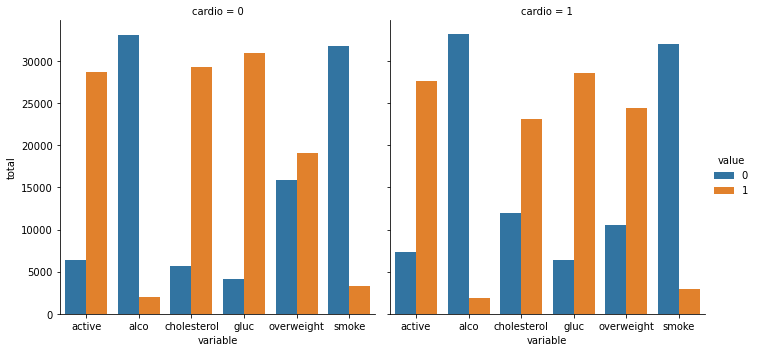

In [55]:
sns.catplot(x="variable",y = "total", col = "cardio", hue='value',kind = "bar",data = df_2)